In [1]:
import gym

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
env = gym.make('FrozenLake-v0')

In [5]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [6]:
learning_rate = .85
dis = .99
num_episodes = 2000

Score over time: 0.349
Final Q-Table Values
[[1.01258127e-02 5.35439583e-03 6.07332630e-01 1.00806211e-02]
 [2.88991775e-04 7.00314599e-04 4.23566418e-05 2.69444453e-01]
 [9.88078526e-04 1.32968857e-02 1.20544048e-02 1.70118942e-01]
 [9.80336517e-06 5.89284929e-04 1.97204730e-04 1.40987651e-01]
 [7.88122457e-01 8.12886572e-04 4.75079572e-04 4.62967824e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.32746970e-01 1.24741592e-04 2.01604819e-06 9.03825890e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.12130057e-03 1.80772882e-03 3.49983555e-05 7.88478582e-01]
 [0.00000000e+00 8.21331306e-01 0.00000000e+00 0.00000000e+00]
 [3.09090552e-01 3.46256754e-05 0.00000000e+00 4.55378738e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.08152027e-04 0.00000000e+00 8.79396019e-01 3.66193734e-04]
 [0.00000000e+00 0.00000000e+00 9.83310885e-01 0.00000000e+00]
 [0.0000000

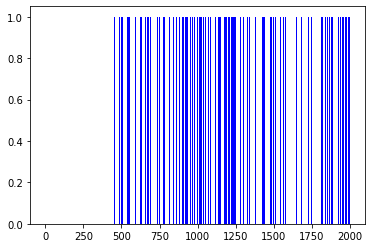

In [7]:
rList = []
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))
        state = new_state
        
        rAll += reward
        
    rList.append(rAll)
    
print("Score over time: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()